# K-nearest neighboors classifier

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n_train = {'A': 30, 'B': 20}
cov = np.array([[4, 2], [2, 4]])
means = {'A': np.array([-1, -1]), 'B': np.array([2, 2])}

In [3]:
def generate_data(n, cov, means):
    data = pd.DataFrame(index=range(sum(n.values())), columns=['x', 'y', 'label'])
    data.loc[:n['A']-1, ['x', 'y']] = np.random.multivariate_normal(means['A'], cov, n['A'])
    data.loc[:n['A']-1, ['label']] = 'A'
    data.loc[n['A']:, ['x', 'y']] = np.random.multivariate_normal(means['B'], cov, n['B'])
    data.loc[n['A']:, ['label']] = 'B'
    return data

In [4]:
data_train = generate_data(n_train, cov, means)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

def predict_knn(knn, X_train, X_test, y_train):
    clf = KNeighborsClassifier(n_neighbors=knn)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

def get_metrics(X_train, X_test, y_train, y_test):
    pred = [predict_knn(i, X_train, X_test, y_train) for i in range(1, 21)]
    acc = [accuracy_score(y_test, y_pred) for y_pred in pred]
    tn = [confusion_matrix(y_test, y_pred)[1, 1] for y_pred in pred]
    tp = [confusion_matrix(y_test, y_pred)[0, 0] for y_pred in pred]
    return acc, tn, tp

In [7]:
def plot_metric(fig, subplot, name, color, y, x=range(1, 21)):
    ax = fig.add_subplot(subplot)
    ax.set_xlabel('k-nn')
    ax.set_ylabel(name)
    plt.plot(x, y, marker='o', color=color, markeredgecolor='black')

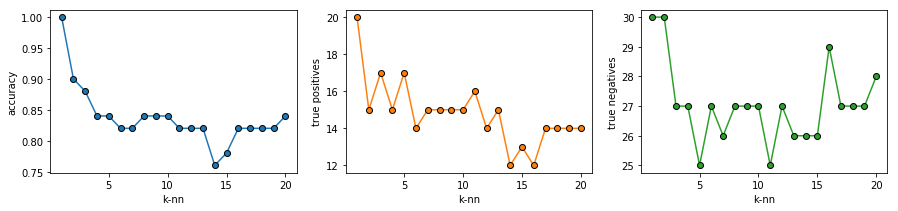

In [8]:
X_train = data_train[['x', 'y']]
y_train = data_train['label']

accuracy, true_pos, true_neg = get_metrics(X_train, X_train, y_train, y_train)

fig = plt.figure(figsize=(15, 3))
plot_metric(fig, 131, 'accuracy', 'tab:blue', accuracy)
plot_metric(fig, 132, 'true positives', 'tab:orange', true_pos)
plot_metric(fig, 133, 'true negatives', 'tab:green', true_neg)
plt.show()

In [9]:
n_test = {'A': 10, 'B': 5}

accuracy_list, true_neg_list, true_pos_list = [], [], []
for i in range(10):
    data_test = generate_data(n_test, cov, means)
    X_test, y_test = data_test[['x', 'y']], data_test['label']
    
    accuracy, true_pos, true_neg = get_metrics(X_train, X_test, y_train, y_test)
    accuracy_list.append(accuracy)
    true_pos_list.append(true_pos)
    true_neg_list.append(true_neg)

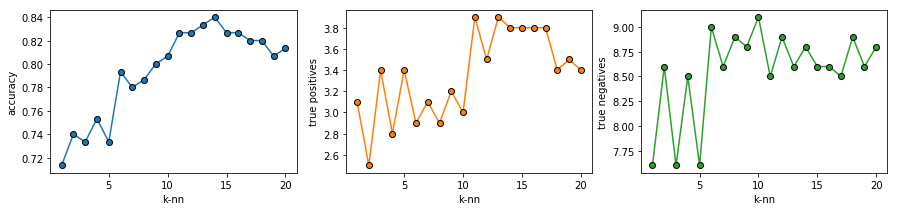

In [10]:
mean_accuracy = np.mean(np.array(accuracy_list), axis=0)
mean_true_neg = np.mean(np.array(true_neg_list), axis=0)
mean_true_pos = np.mean(np.array(true_pos_list), axis=0)
   
fig = plt.figure(figsize=(15, 3))
plot_metric(fig, 131, 'accuracy', 'tab:blue', mean_accuracy)
plot_metric(fig, 132, 'true positives', 'tab:orange', mean_true_pos)
plot_metric(fig, 133, 'true negatives', 'tab:green', mean_true_neg)
plt.show()